# Example usage

To use `energy_manager` in a project:

## 0. Installation

In [1]:
# %pip install energy_manager matplotlib

## 1. Imports

In [2]:
import os
import energy_manager
import matplotlib.pyplot as plt
from energy_manager.expenses.compute_daily_expenses import compute_daily_expenses

## 2. Define mandatory parameters

In [3]:
user_city_name = "Nangis"
openweathermap_api_key = os.getenv("OPEN_WEATHER_API_KEY") # it's supposed that you set your openweathermap api key as an environment variable
user_temperature = 19.5
user_dpe_usage = 1.5

## 3. Define optional parameters if you want

In [4]:
user_insulation_factor = 1.0

## 4. Call the function compute_daily_expenses with your set of parameters

In [5]:
df_daily_expenses = compute_daily_expenses(
        user_temperature=user_temperature,
        user_city_name=user_city_name,
        openweathermap_api_key=openweathermap_api_key,
        user_dpe_usage=user_dpe_usage,
        user_insulation_factor=user_insulation_factor
        )

In [6]:
# You can explore your results and do any manipulation you want
df_daily_expenses.head()

,date_time,weather_description,option_0,option_1,option_2,option_3,option_4,building_type,dpe_class
0,2024-12-05 00:00:00,overcast clouds,4.752827,3.906537,3.906537,3.906537,5.100411,Appartement,A
1,2024-12-05 01:00:00,overcast clouds,4.749812,3.904058,3.904058,3.904058,3.904058,Appartement,A
2,2024-12-05 02:00:00,overcast clouds,4.804095,3.948676,3.948676,3.948676,3.948676,Appartement,A
3,2024-12-05 03:00:00,overcast clouds,4.752827,3.906537,3.906537,3.906537,3.906537,Appartement,A
4,2024-12-05 04:00:00,overcast clouds,4.755843,3.909016,3.909016,3.909016,3.909016,Appartement,A


## 5. Results meaning

Columns option_0, option_1, ..., option_4 values are energy costs in euros per square meter.

Settings of these 5 options provided by ENEDIS for EDF consumers are such as :

  - option_0 : energy price is the same at any hour of the day with a value of 25.16 euros/kwh;
  - option_1, ..., option_4 : energy price during peak hour is 27 euros/Kwh and is 20.68 euros/Kwh during for off-peak hours.


The first row of df_daily_expenses means that for the day 2024-12-04 from 00:00:00 to 01:00:00, if your house is an "Appartement" and has a DPE (diagnostic de performance energetique) of class A, your estimated energy cost for the option_1 is 3.37999 euros per square meter for the desired temperature of 20 Celsius degree.

In [7]:
# Further digging on "Appartement" and dpe_class "A"
df = df_daily_expenses[(df_daily_expenses["building_type"] == "Appartement") & (df_daily_expenses["dpe_class"] == "A")]
df.head()

,date_time,weather_description,option_0,option_1,option_2,option_3,option_4,building_type,dpe_class
0,2024-12-05 00:00:00,overcast clouds,4.752827,3.906537,3.906537,3.906537,5.100411,Appartement,A
1,2024-12-05 01:00:00,overcast clouds,4.749812,3.904058,3.904058,3.904058,3.904058,Appartement,A
2,2024-12-05 02:00:00,overcast clouds,4.804095,3.948676,3.948676,3.948676,3.948676,Appartement,A
3,2024-12-05 03:00:00,overcast clouds,4.752827,3.906537,3.906537,3.906537,3.906537,Appartement,A
4,2024-12-05 04:00:00,overcast clouds,4.755843,3.909016,3.909016,3.909016,3.909016,Appartement,A


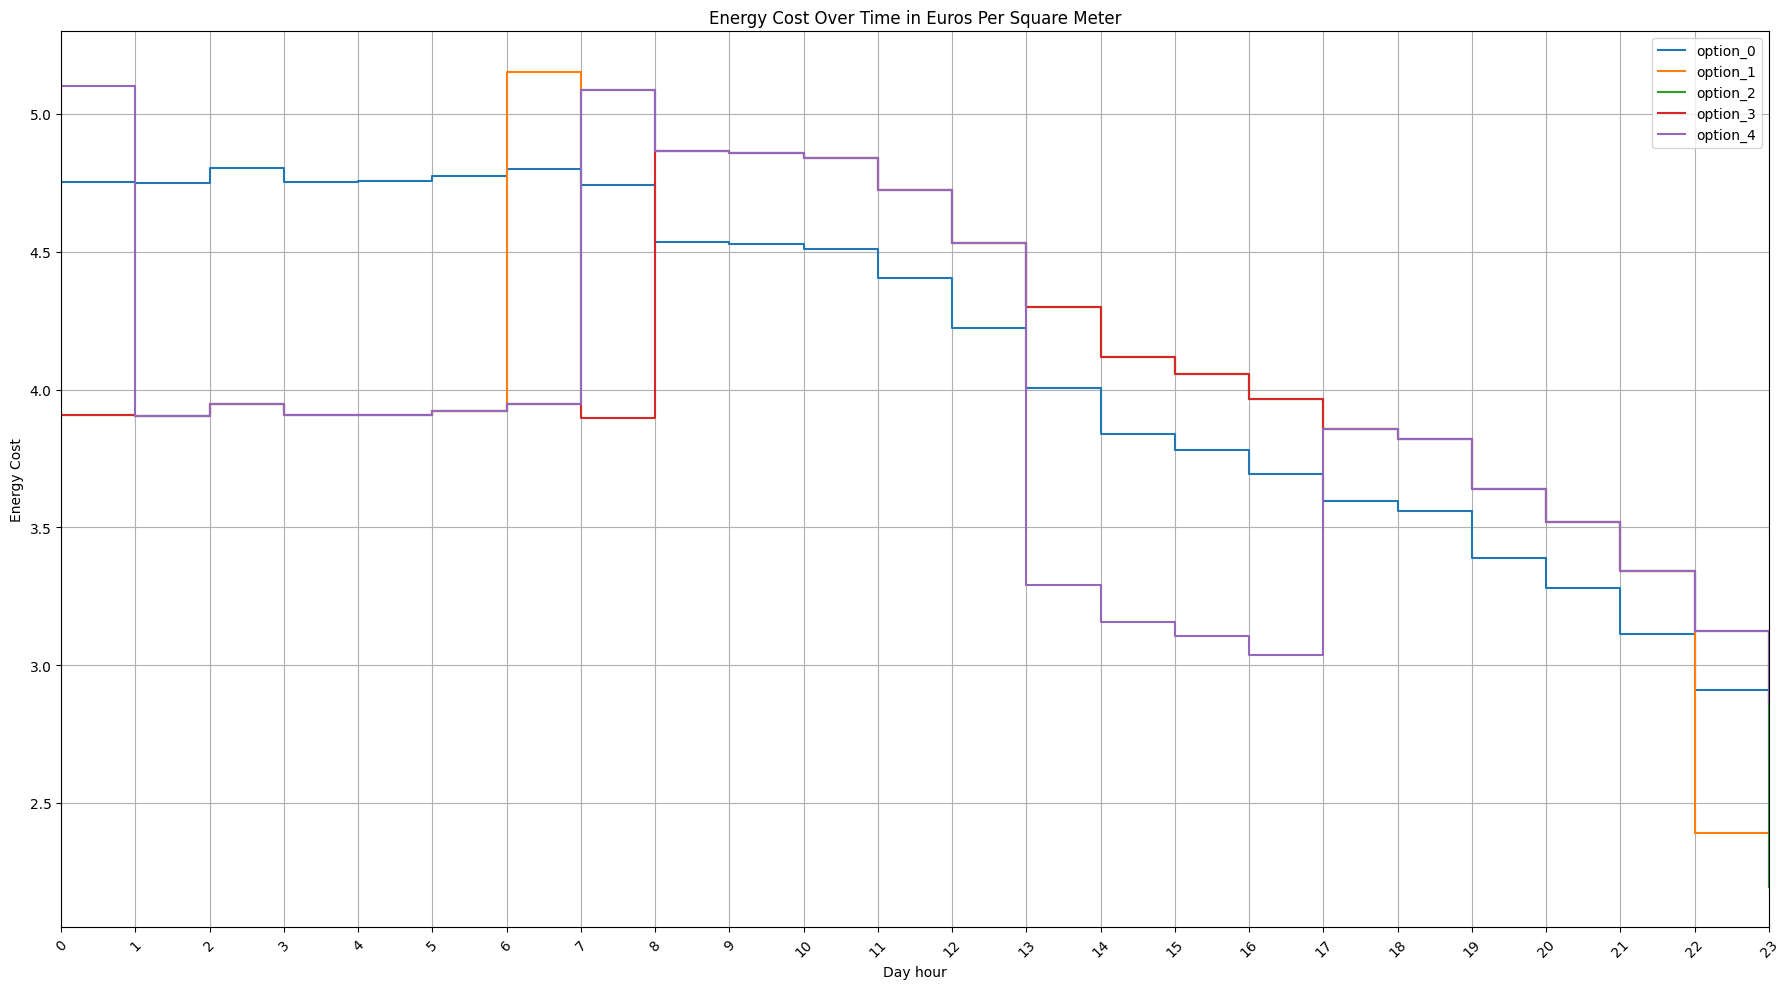

In [8]:
# Some plot
plt.figure(figsize=(18, 10))

# Plot each option
for option in ['option_0', 'option_1', 'option_2', 'option_3', 'option_4']:
    plt.step(df.date_time.dt.hour, df[option], where='post', label=option)

# Adding labels and title
plt.title('Energy Cost Over Time in Euros Per Square Meter')
plt.xlabel('Day hour')
plt.ylabel('Energy Cost')
plt.xticks(rotation=45)
plt.xticks(range(24))  # Set x-ticks to show all hours
plt.xlim(0, 23)        # Set x-axis limits to show only hours of the day
plt.legend()
plt.grid()

# Show plot
plt.tight_layout()
plt.show()

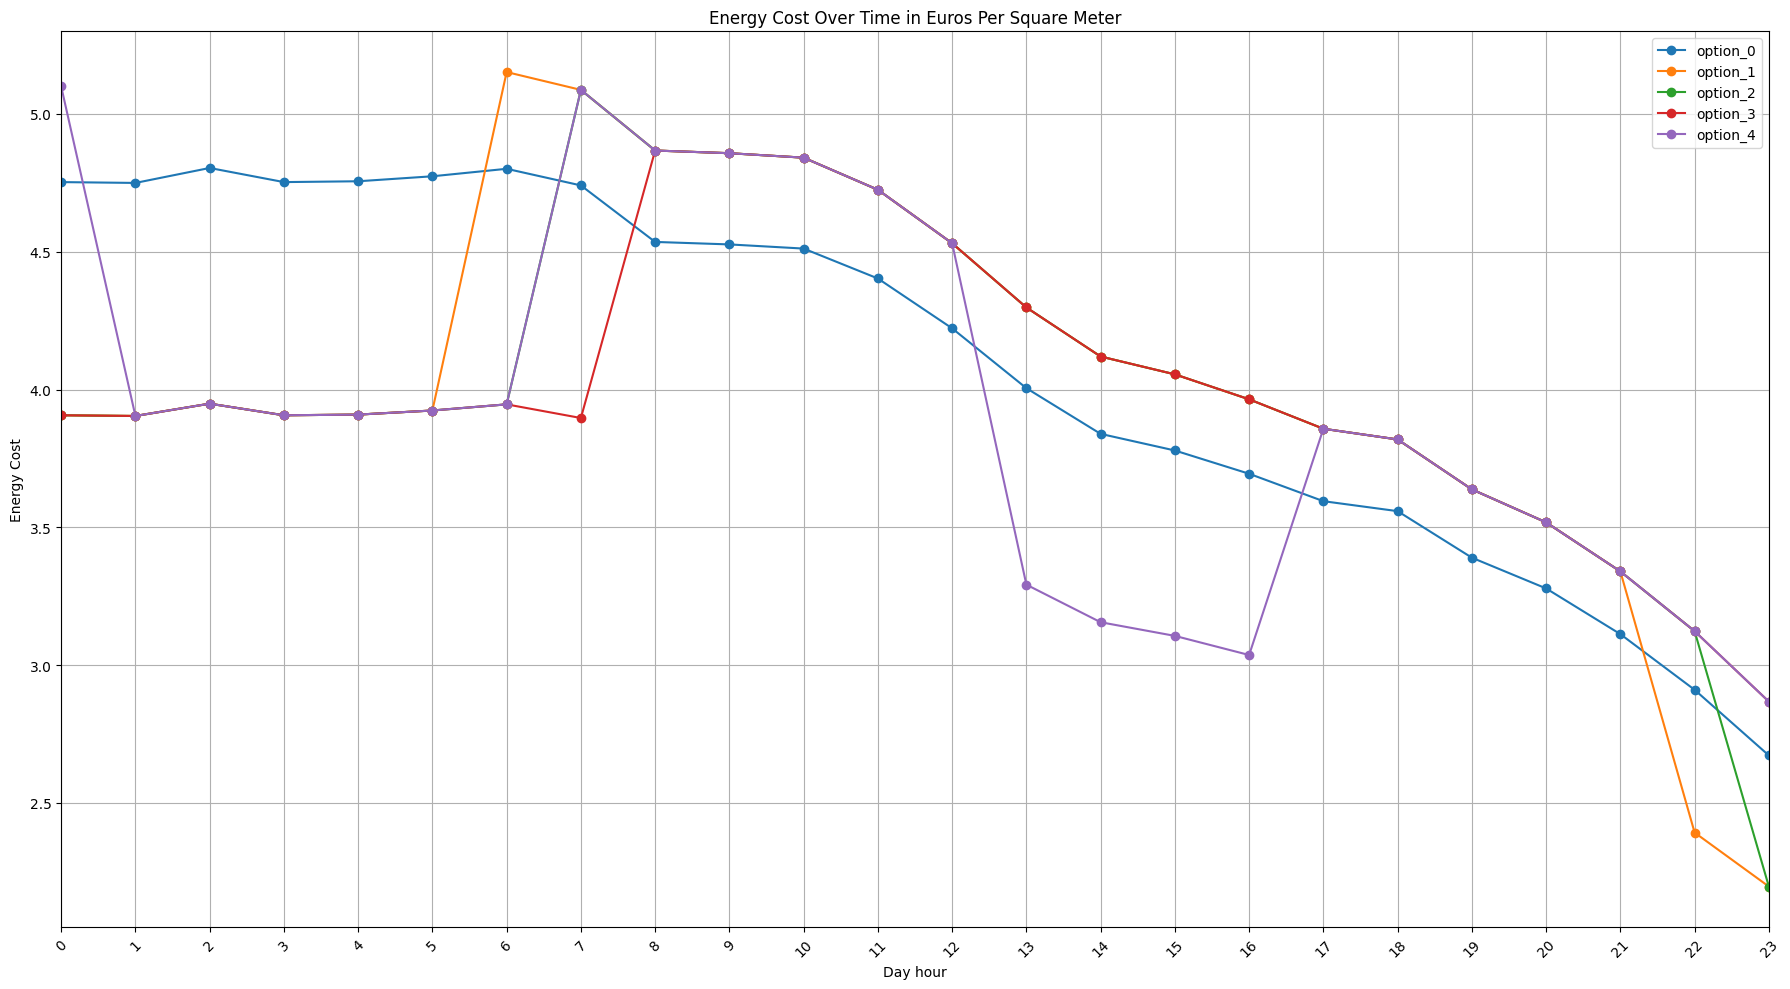

In [9]:
# Some plot
plt.figure(figsize=(18, 10))

# Plot each option
for option in ['option_0', 'option_1', 'option_2', 'option_3', 'option_4']:
    plt.plot(df.date_time.dt.hour, df[option], marker='o', label=option)

# Adding labels and title
plt.title('Energy Cost Over Time in Euros Per Square Meter')
plt.xlabel('Day hour')
plt.ylabel('Energy Cost')
plt.xticks(rotation=45)
plt.xticks(range(24))  # Set x-ticks to show all hours
plt.xlim(0, 23)        # Set x-axis limits to show only hours of the day
plt.legend()
plt.grid()

# Show plot
plt.tight_layout()
plt.show()

#### This can be an insight for how to chose your energy contract with EDF based on your consumption hours. 